In [1]:
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

In [2]:
# Load the files
scene = "individual_files_training_segment-10017090168044687777_6380_000_6400_000_with_camera_labels"
date = "202504131712"

# filepath of the csv file with the scene poses_data
landmarks_file_path = os.path.join(os.getcwd(), scene + "/" + date, "landmarks_" + scene + ".csv")
landmarks_candidates_file_path = os.path.join(os.getcwd(), scene + "/" + date, "landmarks_candidates_" + scene + ".csv")
print("Landmarks File Path:", landmarks_file_path)
print("Landmarks Candidates File Path:", landmarks_candidates_file_path)

Landmarks File Path: /home/rodrigo/catkin_ws/src/TFM_Landmark_Based_Localization/results/individual_files_training_segment-10017090168044687777_6380_000_6400_000_with_camera_labels/202504131712/landmarks_individual_files_training_segment-10017090168044687777_6380_000_6400_000_with_camera_labels.csv
Landmarks Candidates File Path: /home/rodrigo/catkin_ws/src/TFM_Landmark_Based_Localization/results/individual_files_training_segment-10017090168044687777_6380_000_6400_000_with_camera_labels/202504131712/landmarks_candidates_individual_files_training_segment-10017090168044687777_6380_000_6400_000_with_camera_labels.csv


In [3]:
# Filepath of the signs map features csv file
signs_map_features_file_path = os.path.join(
    os.path.dirname((os.getcwd())),
    "pointcloud_clustering/map",
    "signs_map_features_" + scene + ".csv"
)
print("Signs Map Features File Path:", signs_map_features_file_path)

Signs Map Features File Path: /home/rodrigo/catkin_ws/src/TFM_Landmark_Based_Localization/pointcloud_clustering/map/signs_map_features_individual_files_training_segment-10017090168044687777_6380_000_6400_000_with_camera_labels.csv


In [4]:
# Load the CSV files into pandas DataFrames
landmarks_df = pd.read_csv(landmarks_file_path)
landmarks_candidates_df = pd.read_csv(landmarks_candidates_file_path)
signs_map_features_df = pd.read_csv(signs_map_features_file_path, header=None)

In [5]:
landmarks_df

,frame,match_index,Landmark_X,Landmark_Y,Landmark_Z,Landmark_Roll,Landmark_Pitch,Landmark_Yaw
0,[21],[9],29.100233,-3.752252,2.413237,-0.054084,-0.019271,0.056401
1,[24],[-1],34.861315,-4.824980,2.451798,-0.050428,-0.047547,0.057062
2,[28],[9],29.199255,-4.294530,2.241650,-0.045129,-0.091153,0.058280
3,[31],[7],35.401216,-4.832184,3.775533,-0.023774,-0.132045,0.057207
4,[32],[7],35.250033,-4.850321,4.073655,-0.021254,-0.138851,0.054031
5,[35],[-1],34.943992,-4.873785,4.667297,-0.039923,-0.138383,0.043205
6,[40],[-1],36.086599,-4.535858,4.647813,-0.036148,-0.134549,0.023425
7,[41],[-1],35.884159,-4.595404,4.532448,-0.039027,-0.134741,0.018993
8,[43],[-1],36.195509,-4.632979,4.260319,-0.046918,-0.140585,0.009849
9,[45],[-1],36.020698,-4.690079,4.052653,-0.053313,-0.134777,-0.003188


In [6]:
landmarks_candidates_df

,frame,match_index,Landmark_X,Landmark_Y,Landmark_Z,Landmark_Roll,Landmark_Pitch,Landmark_Yaw
0,[1],[0],26.245909,14.102221,1.098236,0.000000,-0.000000,0.000000
1,[1],[0],20.493472,-3.433090,1.895798,0.000000,-0.000000,0.000000
2,[1],[0],29.241638,-1.873816,2.266922,0.000000,-0.000000,0.000000
3,[1],[0],-8.770639,6.958428,2.165044,0.000000,-0.000000,0.000000
4,[1],[0],14.071669,-2.597484,0.455688,0.000000,-0.000000,0.000000
...,...,...,...,...,...,...,...,...
1242,[98],[-1],95.257547,-13.758960,7.903936,-0.028998,-0.082326,-0.168026
1243,[98],[-1],96.786144,-15.140715,10.558664,-0.028998,-0.082326,-0.168026
1244,[98],[-1],101.946816,-4.481218,8.741266,-0.028998,-0.082326,-0.168026
1245,[98],[-1],66.130820,10.276735,6.285135,-0.028998,-0.082326,-0.168026


In [7]:
# Add headers to the signs_map_features_df
signs_map_features_df.columns = ['Landmark_X', 'Landmark_Y', 'Landmark_Z']

In [8]:
signs_map_features_df

,Landmark_X,Landmark_Y,Landmark_Z
0,-21.901657,1.649567,-0.039196
1,1.345892,6.196517,-0.403343
2,13.861255,7.311337,-0.482795
3,16.760594,10.479411,-0.223809
4,28.201192,14.813885,0.915241
5,36.121799,4.173432,2.249615
6,71.671920,-1.781462,5.302349
7,36.137593,-4.577685,2.822090
8,30.050038,-3.790929,2.481605
9,28.851530,-3.560452,2.324062


In [9]:
frame = 1
frame = '['+str(frame)+']'
filtered_landmarks_df = landmarks_df[landmarks_df['frame'] == frame]
filtered_landmarks_df

,frame,match_index,Landmark_X,Landmark_Y,Landmark_Z,Landmark_Roll,Landmark_Pitch,Landmark_Yaw


In [10]:
filtered_landmarks_candidates_df = landmarks_candidates_df[landmarks_candidates_df['frame'] == frame]
filtered_landmarks_candidates_df

,frame,match_index,Landmark_X,Landmark_Y,Landmark_Z,Landmark_Roll,Landmark_Pitch,Landmark_Yaw
0,[1],[0],26.245909,14.102221,1.098236,0.0,-0.0,0.0
1,[1],[0],20.493472,-3.433090,1.895798,0.0,-0.0,0.0
2,[1],[0],29.241638,-1.873816,2.266922,0.0,-0.0,0.0
3,[1],[0],-8.770639,6.958428,2.165044,0.0,-0.0,0.0
4,[1],[0],14.071669,-2.597484,0.455688,0.0,-0.0,0.0
5,[1],[0],1.200633,5.970355,0.244110,0.0,-0.0,0.0
6,[1],[0],5.868901,-5.091784,2.011673,0.0,-0.0,0.0
7,[1],[0],-12.017099,-5.590917,2.061470,0.0,-0.0,0.0
8,[1],[0],-17.091765,-0.049761,0.614693,0.0,-0.0,0.0
9,[1],[0],-7.117458,-5.517109,1.541016,0.0,-0.0,0.0


In [11]:
def calculate_center_and_max_radius(landmarks_df):
    """
    Calcula el centro en X e Y y el radio máximo de los landmarks.

    Parameters:
        landmarks_df (pd.DataFrame): DataFrame que contiene las columnas 'Landmark_X' y 'Landmark_Y'.

    Returns:
        tuple: Una tupla con el centro en X, el centro en Y y el radio máximo.
    """
    if landmarks_df.empty:
        return None, None, None

    center_x = landmarks_df['Landmark_X'].mean()
    center_y = landmarks_df['Landmark_Y'].mean()

    # Calcular el radio máximo como la distancia máxima desde el centro
    distances = ((landmarks_df['Landmark_X'] - center_x)**2 + (landmarks_df['Landmark_Y'] - center_y)**2)**0.5
    max_radius = distances.max()

    return center_x, center_y, max_radius

In [12]:
center_x, center_y, max_radius = calculate_center_and_max_radius(filtered_landmarks_candidates_df)
print(f"Centro en X: {center_x}, Centro en Y: {center_y}, Radio máximo: {max_radius}")

max_radius = max_radius + 10

Centro en X: 3.7831199902823403, Centro en Y: 0.9057124555710545, Radio máximo: 26.05234571129065


In [13]:
filtered_signs_map_features_df = signs_map_features_df[
        ((signs_map_features_df['Landmark_X'] - center_x)**2 + 
        (signs_map_features_df['Landmark_Y'] - center_y)**2)**0.5 <= max_radius
]

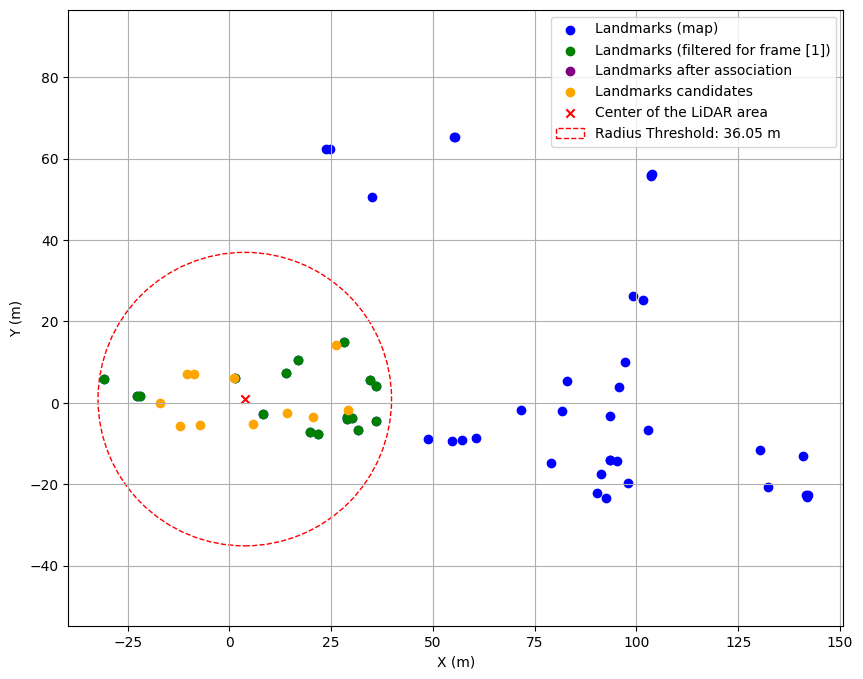

In [14]:
# Draw the circle
circle = plt.Circle((center_x, center_y), max_radius, color='red', fill=False, linestyle='--', label=f'Radius Threshold: {max_radius:.2f} m')

# Plot the data
plt.figure(figsize=(10, 8))
plt.scatter(signs_map_features_df['Landmark_X'], signs_map_features_df['Landmark_Y'], color='blue', label='Landmarks (map)')
plt.scatter(filtered_signs_map_features_df['Landmark_X'], filtered_signs_map_features_df['Landmark_Y'], color='green', label=f'Landmarks (filtered for frame {frame})')
plt.scatter(filtered_landmarks_df['Landmark_X'], filtered_landmarks_df['Landmark_Y'], color='purple', label='Landmarks after association')
plt.scatter(filtered_landmarks_candidates_df['Landmark_X'], filtered_landmarks_candidates_df['Landmark_Y'], color='orange', label='Landmarks candidates')
plt.scatter(center_x, center_y, color='red', label='Center of the LiDAR area', marker='x')

# Add the circle to the plot
plt.gca().add_artist(circle)

# Add labels, legend, and grid
plt.legend()
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid()

# Set equal scaling for axes
plt.axis('equal')

plt.show()

In [ ]:
import scipy.spatial

# Función para evaluar los matches
def evaluate_matches(globalmapdata, evalmapdata):
    n = globalmapdata['poleparams'].shape[0]
    evalpolemap = evalmapdata['polemeans'][:, :2]
    n_eval = evalpolemap.shape[0]
    maxdist = 1.0
    kdtree = scipy.spatial.cKDTree(globalmapdata['poleparams'][:, :2], leafsize=10)
    dist, _ = kdtree.query(evalpolemap, k=1, distance_upper_bound=maxdist)
    n_matches = np.sum(np.isfinite(dist))

    matched_param = evalpolemap[np.isfinite(dist), :]
    TP = n_matches
    FP = n_eval - n_matches
    FN = n - n_matches
    precision = (TP + 0.0) / (TP + FP)
    recall = (TP + 0.0) / (TP + FN)
    F1 = 2 * precision * recall / (precision + recall)

    # Return matched_params as a dictionary
    matched_params = {
        'matched_coordinates': matched_param,
        'n_matches': n_matches,
        'TP': TP,
        'FP': FP,
        'FN': FN,
        'precision': precision,
        'recall': recall,
        'F1': F1
    }
    return matched_params

In [ ]:
def evaluate_frame(frame, landmarks_df, signs_map_df):
    """
    Evaluates matches for a specific frame.

    Parameters:
        frame (int): The frame number to evaluate.
        landmarks_df (pd.DataFrame): DataFrame containing landmarks data.
        signs_map_df (pd.DataFrame): DataFrame containing signs map features.

    Returns:
        dict: A dictionary containing matched parameters and evaluation metrics.
    """
    frame_candidates_df = landmarks_df[landmarks_df['frame'] == frame]

    # Calculate center and radius
    center_x, center_y, max_radius = calculate_center_and_max_radius(frame_candidates_df)
    if center_x is None or center_y is None or max_radius is None:
        return None

    # Filter signs map features using the center and radius
    filtered_signs_map = signs_map_df[
        ((signs_map_df['Landmark_X'] - center_x)**2 + 
         (signs_map_df['Landmark_Y'] - center_y)**2)**0.5 <= max_radius
    ]

    # Prepare data for evaluate_matches
    globalmapdata = {'poleparams': filtered_signs_map[['Landmark_X', 'Landmark_Y']].to_numpy()}
    evalmapdata = {'polemeans': frame_candidates_df[['Landmark_X', 'Landmark_Y']].to_numpy()}

    # Evaluate matches
    matched_params = evaluate_matches(globalmapdata, evalmapdata)

    return matched_params

In [ ]:
# Evaluate a single frame
clustering_frame_results = evaluate_frame('[1]', landmarks_candidates_df, signs_map_features_df)
pprint.pprint(clustering_frame_results)

In [ ]:
# Evaluate all frames
unique_frames = landmarks_candidates_df['frame'].unique()

results_clustering = []
results_association = []
for frame in unique_frames:
    results_clustering.append({'frame': frame, 'matched_params': evaluate_frame(frame, landmarks_candidates_df, signs_map_features_df)})
    results_association.append({'frame': frame, 'matched_params': evaluate_frame(frame, landmarks_df, signs_map_features_df)})

In [ ]:
# Create a DataFrame from the association results
results_association_df = pd.DataFrame(results_association)

# Expand the 'matched_params' column into separate columns, handling None values
results_association_df['matched_params'] = results_association_df['matched_params'].apply(lambda x: {} if x is None else x)
expanded_columns = results_association_df['matched_params'].apply(pd.Series)

# Concatenate the expanded columns with the original DataFrame
results_association_df = pd.concat([results_association_df.drop(columns=['matched_params']), expanded_columns], axis=1)

# Display the expanded DataFrame
results_association_df

In [ ]:
# Create a DataFrame from the association results
results_clustering_df = pd.DataFrame(results_clustering)

# Expand the 'matched_params' column into separate columns, handling None values
results_clustering_df['matched_params'] = results_clustering_df['matched_params'].apply(lambda x: {} if x is None else x)
expanded_columns = results_clustering_df['matched_params'].apply(pd.Series)

# Concatenate the expanded columns with the original DataFrame
results_clustering_df = pd.concat([results_clustering_df.drop(columns=['matched_params']), expanded_columns], axis=1)

# Display the expanded DataFrame
results_clustering_df